In [1]:
from Node import Node
import networkx as nx

In [36]:
def dfs(matrix, size, i=0, j=0, pathToReturn=set([Node('S',0,0,0)]), visited=set([(0,0)])):

    # right,down operator
    # if( matrix[i+1][j+1]!='X' and matrix[i][j+1]!='X' and matrix[i+1][j]!='X' and i < size-1 and j < size-1  and (i,j) not in visited):
    #     currentNode = [node for node in pathToReturn if node.i == i and node.j == j]
    #     nextNode = [node for node in pathToReturn if node.i == i+1 and node.j == j+1]
    #     if(not nextNode):
    #         nextNode = Node(matrix[i+1][j+1], i+1, j+1, currentNode.distance+1, currentNode)
    #     if(nextNode.distance > currentNode.distance+1):
    #         nextNode.parent = currentNode
    #     visited.add((i,j))
    #     visited.add((i+1,j+1))
    #     pathToReturn.add(nextNode)
    #     dfs(matrix,size,i+1,j+1,pathToReturn,visited)
    # right,up operator
    #elif(matrix[i+1][j-1] == 'R' and i < size and j > 0 and (i,j) not in visited):

    # left,down operator
    #elif(matrix[i-1][j+1] == 'R' and i > 0 & j < size and (i,j) not in visited):

    # left,up operator
    #elif(matrix[i-1][j-1] == 'R' and j > 0 & i > 0 and (i,j) not in visited):

    # right operato
    try:
        if(matrix[i][j+1] != 'X' and j < size-1 and (i,j+1) not in visited):
            currentNode = [node for node in pathToReturn if node.i == i and node.j == j]
            nextNode = [node for node in pathToReturn if node.i == i and node.j == j+1]
            if(not nextNode):
                nextNode = Node(matrix[i][j+1], i, j+1, currentNode[0].distance +2, currentNode[0])
            if(nextNode.distance > currentNode[0].distance+2):
                nextNode.parent = currentNode[0]
            visited.add((i,j+1))
            pathToReturn.add(nextNode)
            dfs(matrix, size, i, j+1, pathToReturn, visited)
    except:
        {}    
    # left operator
    try:
        if(matrix[i][j-1] != 'X' and j > 0 and (i,j-1) not in visited):
            currentNode = [node for node in pathToReturn if node.i == i and node.j == j]
            nextNode = [node for node in pathToReturn if node.i == i and node.j == j-1]
            if(not nextNode):
                nextNode = Node(matrix[i][j-1], i, j-1, currentNode[0].distance +2, currentNode[0])
            if(nextNode.distance > currentNode[0].distance+2):
                nextNode.parent = currentNode[0]
            visited.add((i,j-1))
            pathToReturn.add(nextNode)
            dfs(matrix, size, i, j-1, pathToReturn, visited)
    except:
        {}
    # down operator
    try:
        if(matrix[i+1][j] != 'X' and i < size-1 and (i+1,j) not in visited):
            currentNode = [node for node in pathToReturn if node.i == i and node.j == j]
            nextNode = [node for node in pathToReturn if node.i == i+1 and node.j == j]
            if(not nextNode):
                nextNode = Node(matrix[i+1][j], i+1, j, currentNode[0].distance +2, currentNode[0])
            if(nextNode.distance > currentNode[0].distance+2):
                nextNode.parent = currentNode[0]
            visited.add((i+1,j))
            pathToReturn.add(nextNode)
            dfs(matrix, size, i+1, j, pathToReturn, visited)
    except:
        {}
    # up operator
    try:
        if(matrix[i-1][j] != 'X' and i > 0 and (i-1,j) not in visited):
            currentNode = [node for node in pathToReturn if node.i == i and node.j == j]
            nextNode = [node for node in pathToReturn if node.i == i-1 and node.j == j]
            if(not nextNode):
                nextNode = Node(matrix[i][j+1], i-1, j, currentNode[0].distance +2, currentNode[0])
            if(nextNode.distance > currentNode[0].distance+2):
                nextNode.parent = currentNode[0]
            visited.add((i-1,j))
            pathToReturn.add(nextNode)
            dfs(matrix, size, i-1, j, pathToReturn, visited)
    except:
        {}
    return pathToReturn, visited

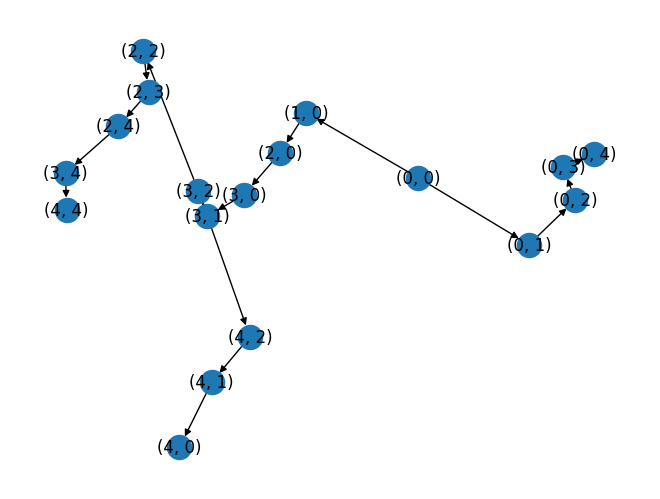

In [43]:
def main():
    with open('input.txt', 'r') as file:
        # read the first line and convert to integer
        algorithmNum = int(file.readline().strip())
        
        # read the second line and convert to integer
        size = int(file.readline().strip())
        
        # create an empty matrix
        matrix = []
        
        # read the rest of the lines and append each row as a list to the matrix
        for line in file:
            matrix.append(list(line.strip()))

    path, visited = dfs(matrix,size)
    nodeList = list(path)
    #print(visited)
    edges = [((node.parent.i,node.parent.j),(node.i,node.j)) for node in nodeList if node.parent]
    #print(edges)
    T = nx.DiGraph()
    T.add_nodes_from(visited)
    T.add_edges_from(edges)
    nx.draw(T, with_labels=True)
main()